In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('../cleaned_data/cleaned_data.csv')

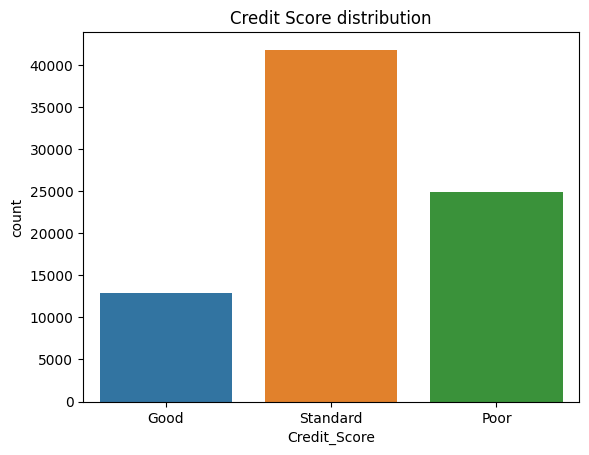

In [3]:
plt.title('Credit Score distribution')
sns.countplot(data=df, x='Credit_Score')
plt.show()

Class Imbalance so Balancing of the classes needs to be done 

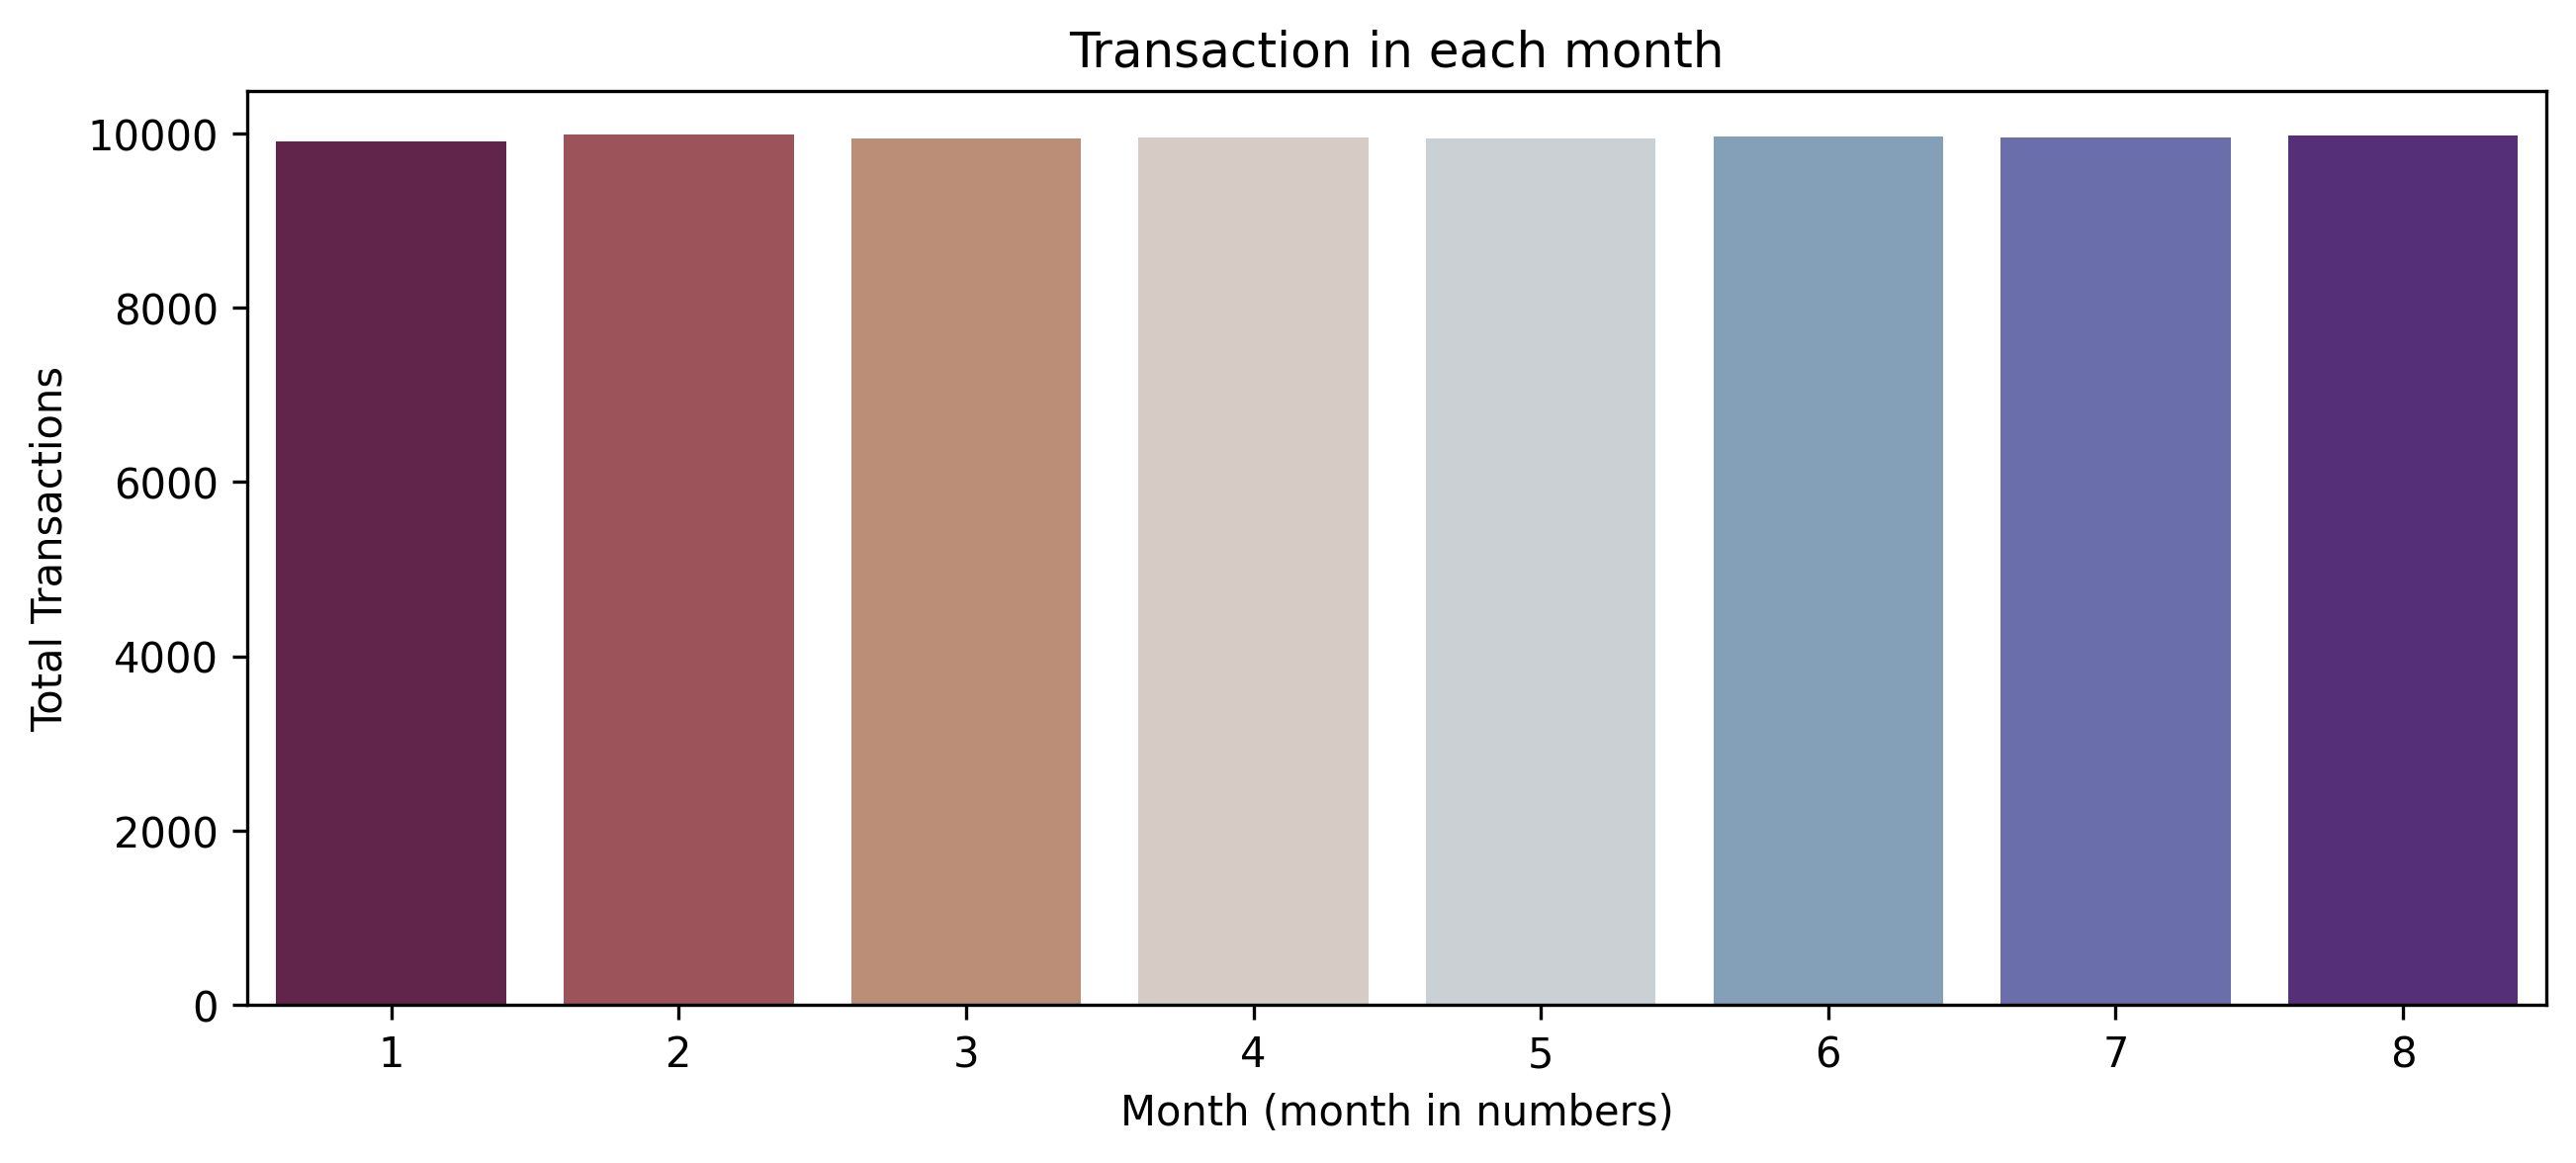

In [4]:
plt.figure(figsize=(10,4), dpi=300)
plt.title('Transaction in each month')
sns.countplot(data=df, x='Month', palette='twilight_shifted_r')
plt.xlabel('Month (month in numbers)')
plt.ylabel('Total Transactions')
plt.show()

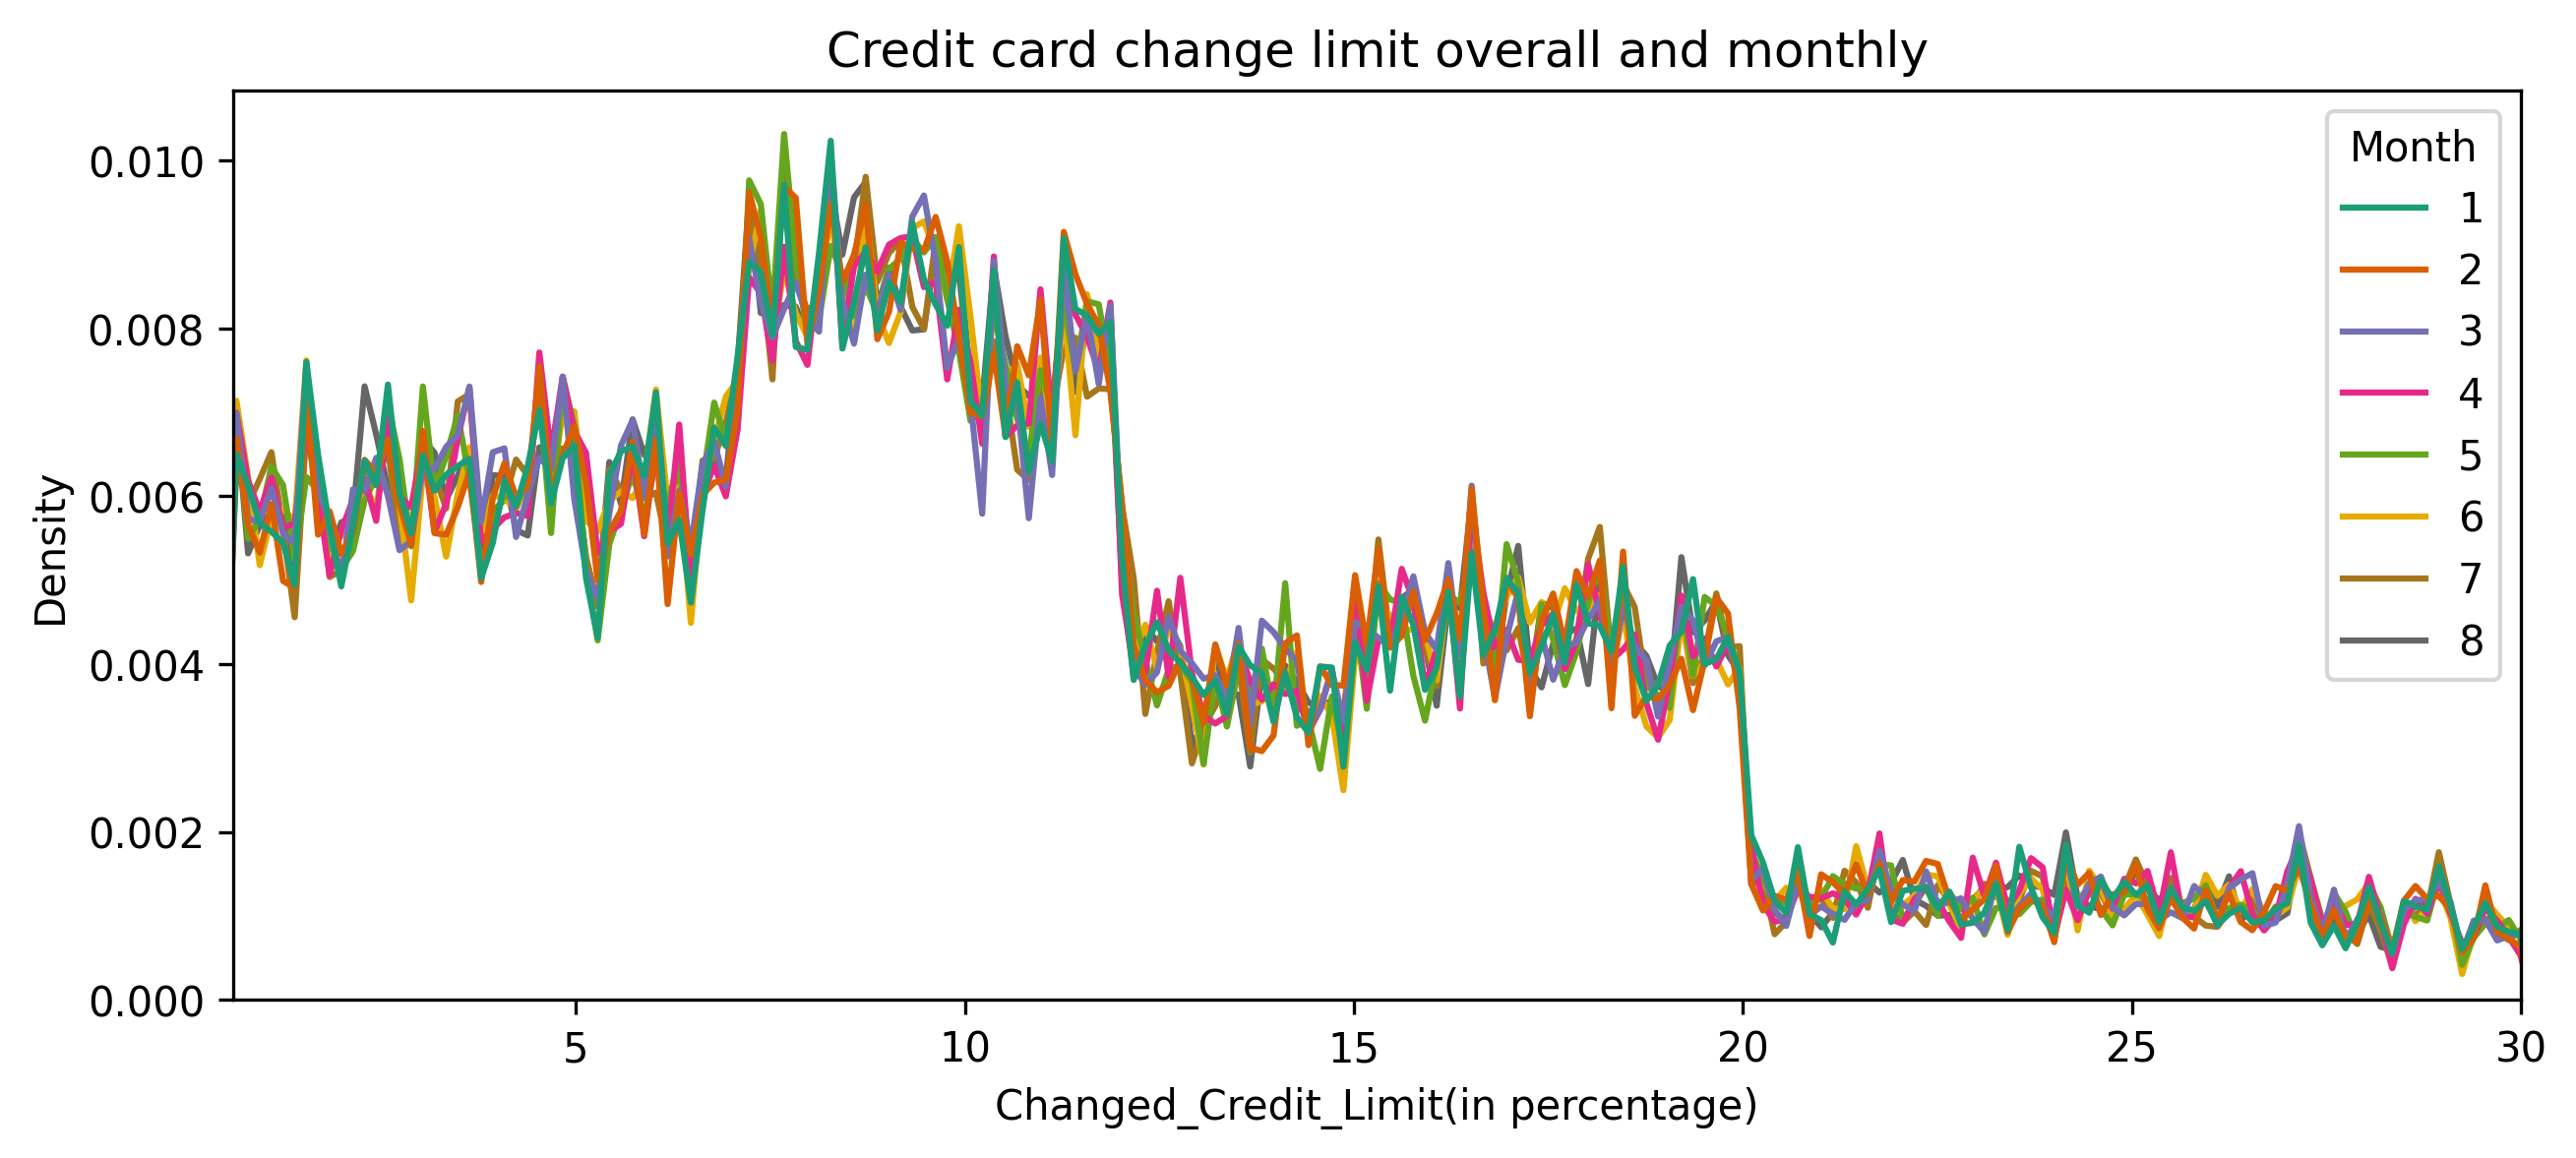

In [5]:
plt.figure(figsize=(10,4), dpi=300)
plt.title('Credit card change limit overall and monthly')
plt.xlim(0.6,30)
sns.kdeplot(data=df, x='Changed_Credit_Limit', palette='Dark2', hue='Month', bw_adjust=0.05, legend=True)
plt.xlabel('Changed_Credit_Limit(in percentage)')
plt.show()

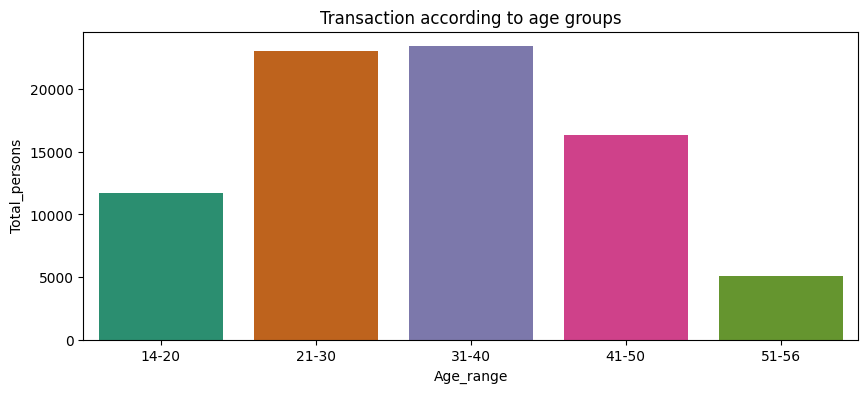

In [6]:
age = {}
x = 0
ages = df.Age.value_counts()
for i in range(14, 57):
    x += ages[i]
    if i == 20:
        age['14-20'] = x
        x = 0
    elif i == 30:
        age['21-30'] = x
        x = 0
    elif i == 40:
        age['31-40'] = x
        x = 0
    elif i == 50:
        age['41-50'] = x
        x = 0
    elif i == 56:
        age['51-56'] = x
age_groups = pd.DataFrame({'Age_range': age.keys(), 'Total_persons': age.values()})
plt.figure(figsize=(10,4), dpi=100)
plt.title('Transaction according to age groups')
sns.barplot(data=age_groups, x='Age_range', y='Total_persons', palette='Dark2')
plt.show()

<Axes: title={'center': 'Bank account distribution for each age agroup'}, xlabel='Age_groups', ylabel='Num_Bank_Accounts'>

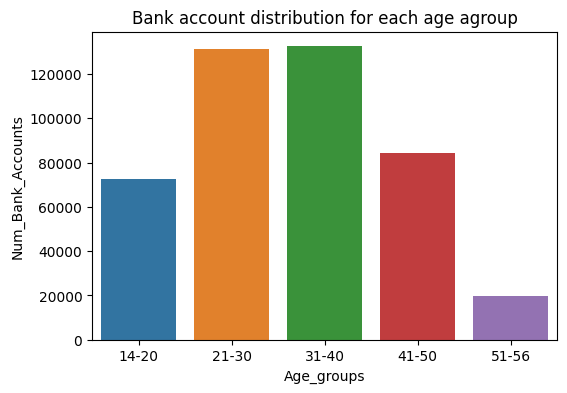

In [7]:
a = df.groupby('Age')['Num_Bank_Accounts'].sum()
x = 0
age_wise_accounts = {}

for i in a.index:
    x += a[i]
    if i == 20:
        age_wise_accounts['14-20'] = x
        x = 0
    elif i == 30:
        age_wise_accounts['21-30'] = x
        x = 0
    elif i == 40:
        age_wise_accounts['31-40'] = x
        x = 0
    elif i == 50:
        age_wise_accounts['41-50'] = x
        x = 0
    elif i == 56:
        age_wise_accounts['51-56'] = x 
account_distribution = pd.DataFrame({'Age_groups': age_wise_accounts.keys(), 'Num_Bank_Accounts': age_wise_accounts.values()})
plt.figure(figsize=(6,4), dpi=100)
plt.title('Bank account distribution for each age agroup')
sns.barplot(data=account_distribution, x='Age_groups', y='Num_Bank_Accounts')

<Axes: xlabel='Credit_Score', ylabel='count'>

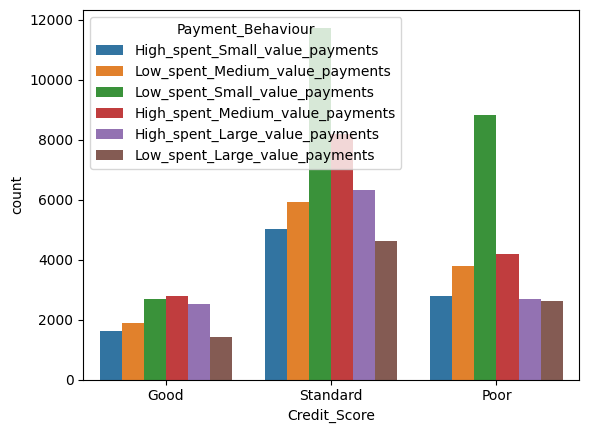

In [8]:
sns.countplot(data=df, x="Credit_Score", hue="Payment_Behaviour")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Scientist'),
  Text(1, 0, 'Teacher'),
  Text(2, 0, 'Engineer'),
  Text(3, 0, 'Entrepreneur'),
  Text(4, 0, 'Lawyer'),
  Text(5, 0, 'Media_Manager'),
  Text(6, 0, 'Doctor'),
  Text(7, 0, 'Journalist'),
  Text(8, 0, 'Manager'),
  Text(9, 0, 'Mechanic'),
  Text(10, 0, 'Writer'),
  Text(11, 0, 'Accountant'),
  Text(12, 0, 'Architect'),
  Text(13, 0, 'Musician'),
  Text(14, 0, 'Developer')])

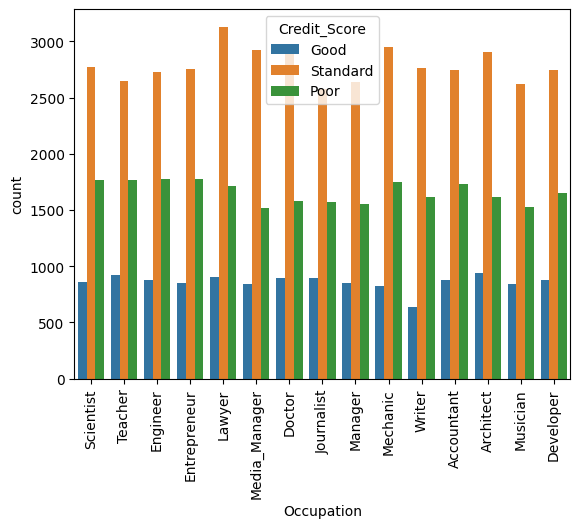

In [9]:
sns.countplot(data=df, x="Occupation", hue="Credit_Score")
plt.xticks (rotation='vertical')

<Axes: xlabel='Credit_Mix', ylabel='count'>

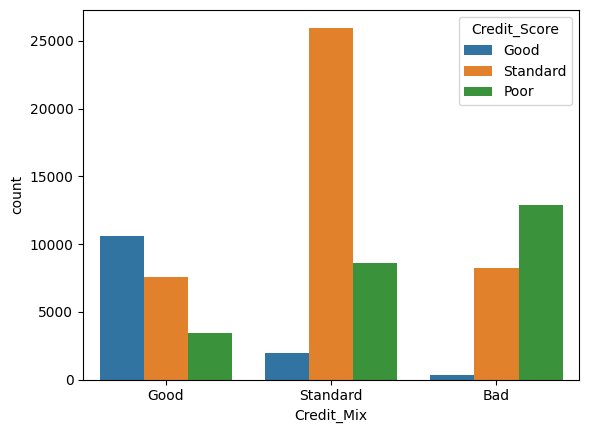

In [10]:
sns.countplot(data=df, x="Credit_Mix", hue="Credit_Score")

<Axes: xlabel='Credit_Score', ylabel='Num_Credit_Card'>

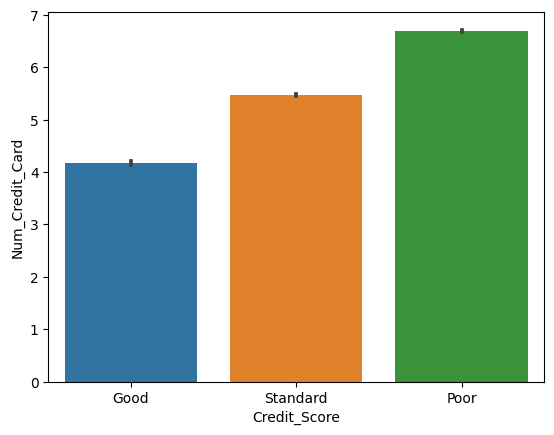

In [11]:
sns.barplot(data=df, x="Credit_Score", y="Num_Credit_Card")

<Axes: xlabel='Credit_Score', ylabel='Num_Bank_Accounts'>

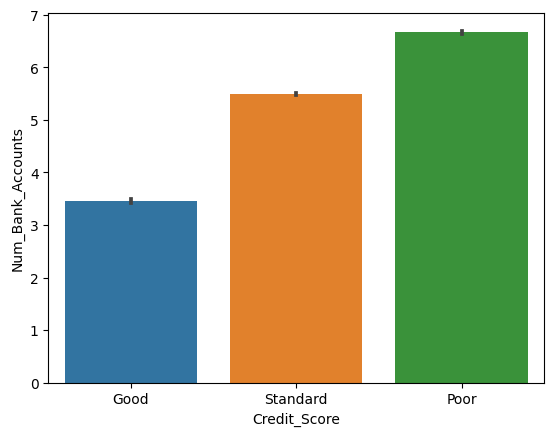

In [12]:
sns.barplot(data=df, x="Credit_Score", y="Num_Bank_Accounts")

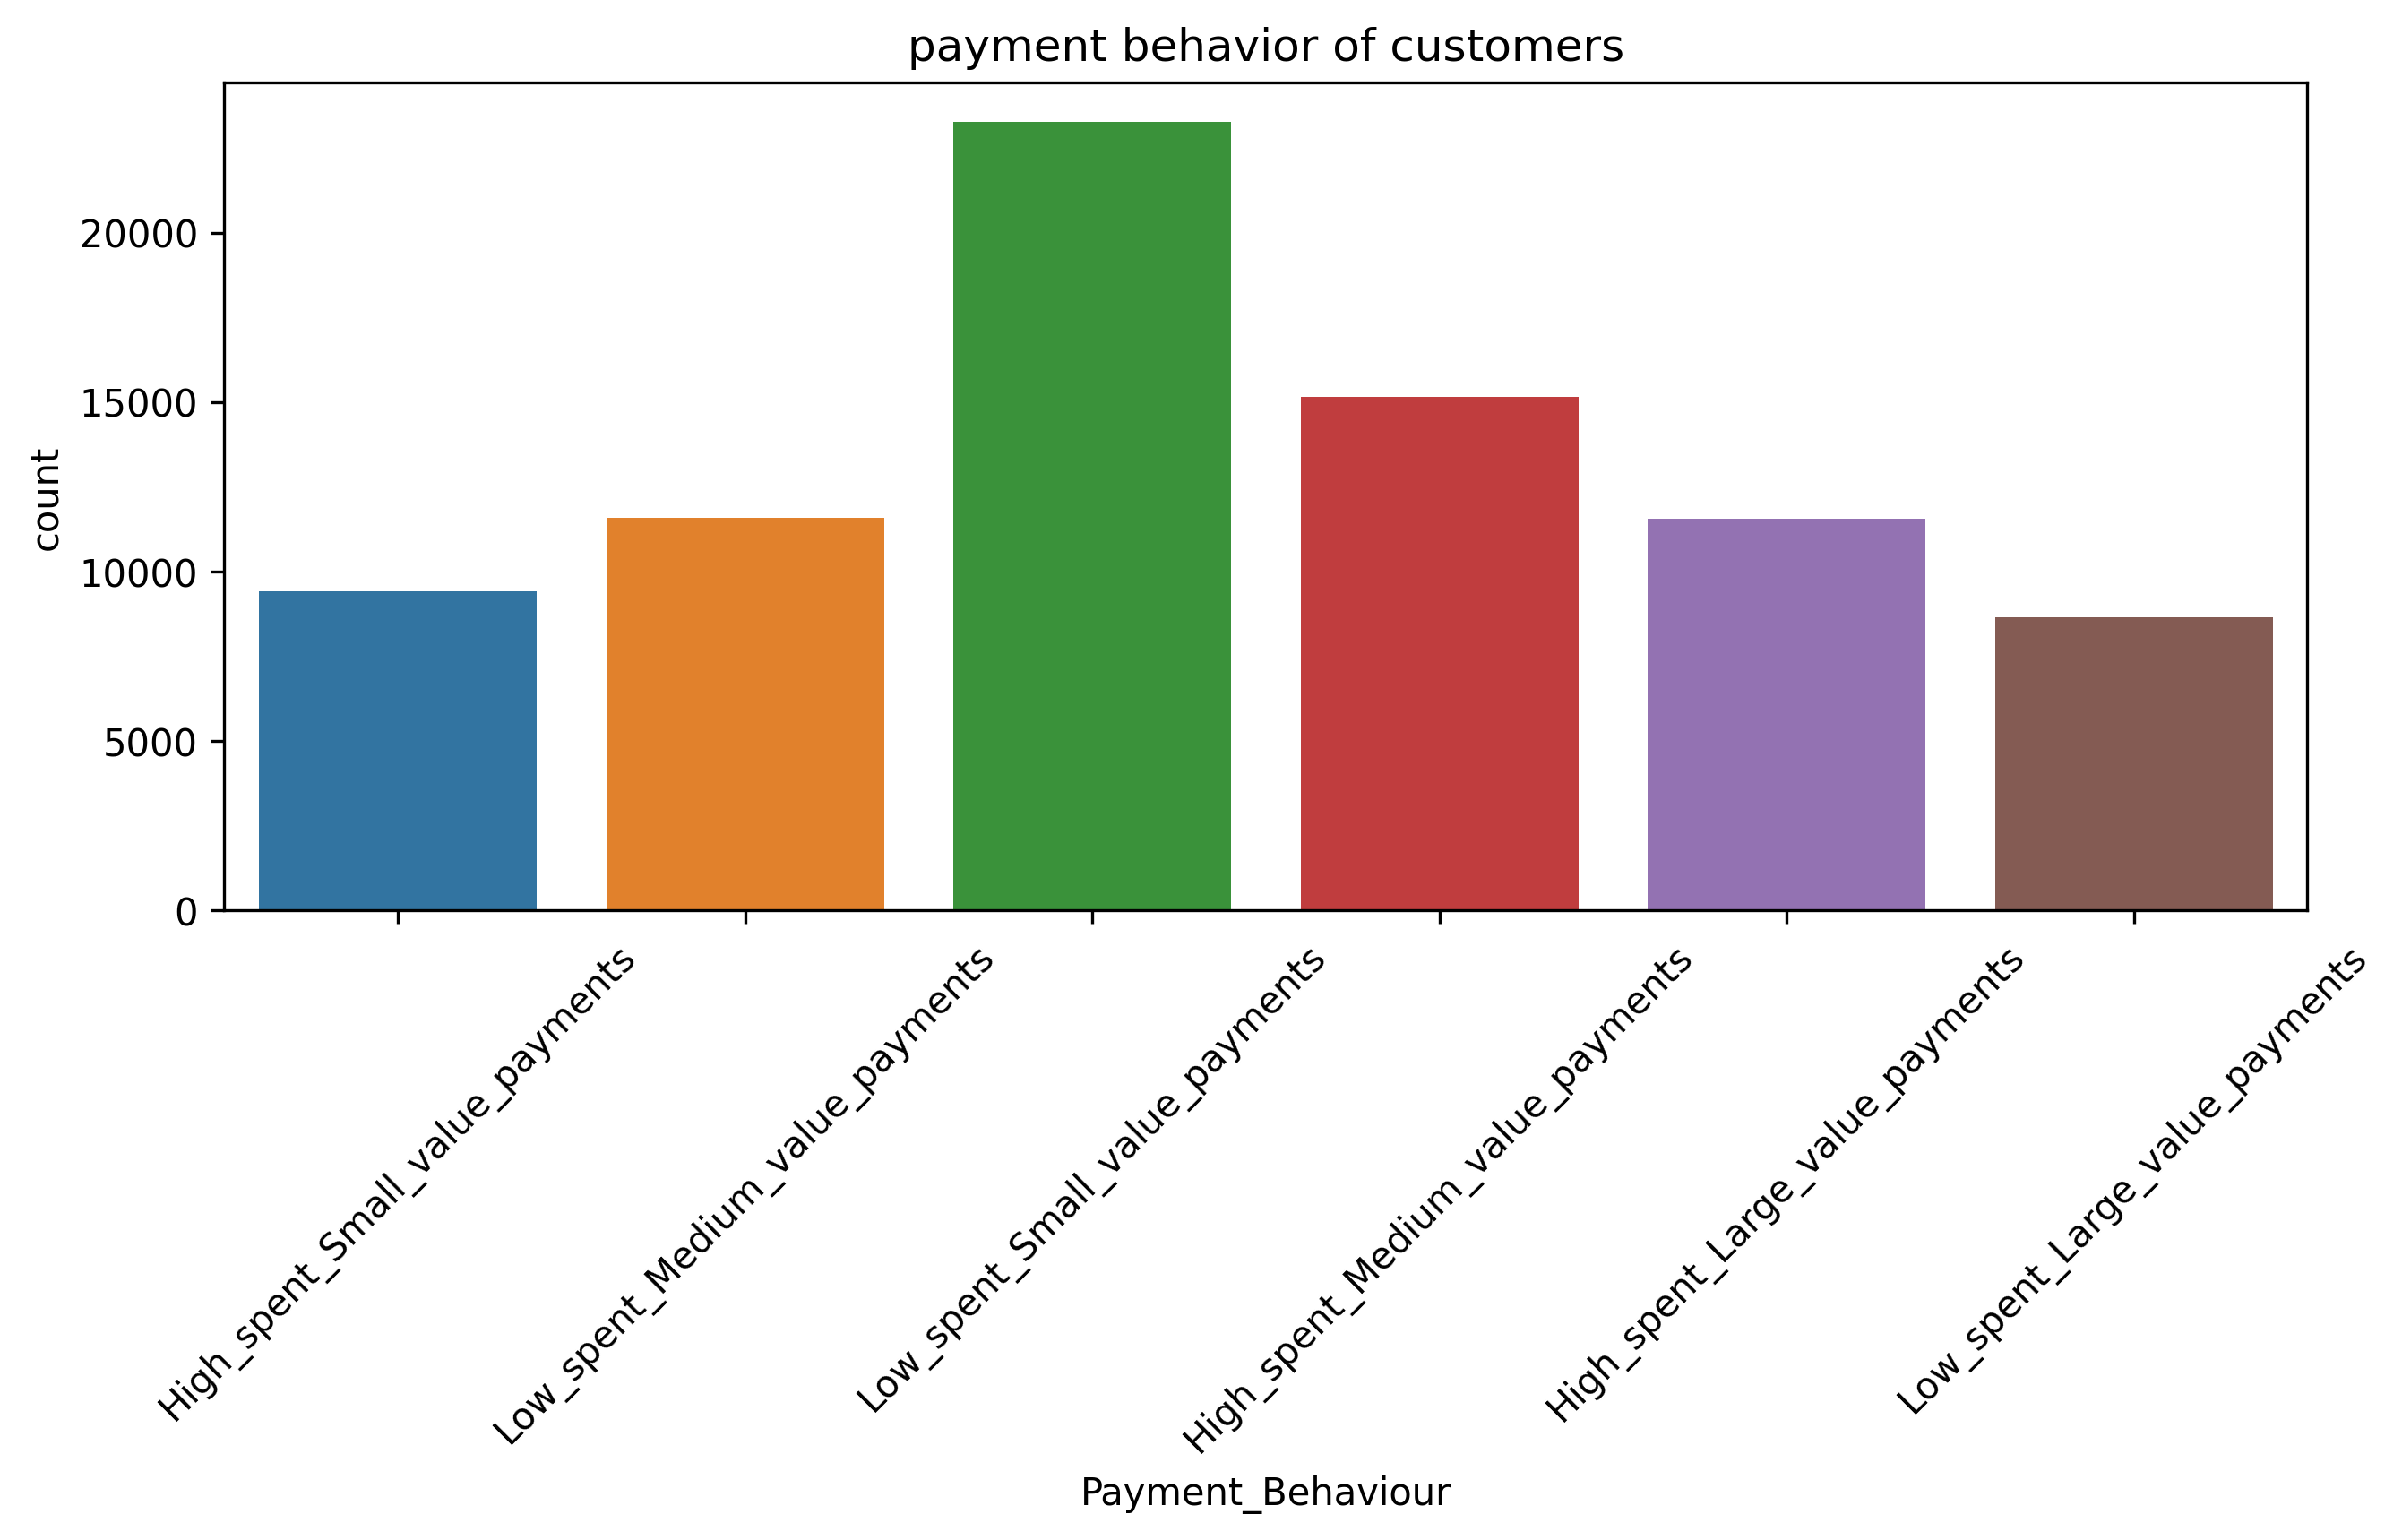

In [13]:
plt.figure(figsize=(10,4), dpi=300)
plt.xticks(rotation=45)
plt.title('payment behavior of customers')
sns.countplot(data=df, x='Payment_Behaviour')
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder
df_copy = df.copy()
cat_vars = [var for var in df_copy.columns if df_copy[var].dtypes=='O']
df_copy[cat_vars] = df_copy[cat_vars].astype(str).apply(LabelEncoder().fit_transform)
df_copy.head()
# Credit Score 1 -> 

,Unnamed: 0,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0,3392,1,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,...,1,809.98,26.822620,265.0,1,49.574949,80.415295,2,312.494089,0
1,2,3392,3,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,...,1,809.98,28.609352,267.0,1,49.574949,81.699521,4,331.209863,0
2,3,3392,4,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,...,1,809.98,31.377862,268.0,1,49.574949,199.458074,5,223.451310,0
3,4,3392,5,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,...,1,809.98,24.797347,269.0,1,49.574949,41.420153,1,341.489231,0
4,5,3392,6,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,...,1,809.98,27.262259,270.0,1,49.574949,62.430172,1,340.479212,0


In [20]:
corr

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
Customer_ID,1.000000,0.000680,-0.005513,0.002642,0.013979,0.013253,-0.002627,-0.010523,-0.004965,0.014580,...,-0.011007,0.003160,0.000887,-0.015117,0.001409,0.026796,0.003400,0.002465,0.001374,-0.012207
Month,0.000680,1.000000,0.016858,0.001343,-0.000238,-0.001972,0.000237,0.001648,-0.000005,0.000771,...,-0.000433,-0.000215,0.001134,0.022382,0.001021,0.045775,0.000038,0.004556,0.000268,-0.036932
Age,-0.005513,0.016858,1.000000,-0.005195,0.090172,0.089301,-0.192139,-0.153999,-0.215393,-0.203155,...,0.078679,-0.200802,0.020608,0.236926,-0.158973,-0.028634,0.006113,-0.032031,-0.004609,-0.052503
Occupation,0.002642,0.001343,-0.005195,1.000000,-0.002717,-0.003051,0.013653,0.004615,0.011120,-0.005960,...,0.008188,0.006459,0.000284,-0.004578,-0.002738,-0.000842,-0.000191,0.003339,0.003714,0.008880
Annual_Income,0.013979,-0.000238,0.090172,-0.002717,1.000000,0.998151,-0.291404,-0.223020,-0.308747,-0.249660,...,0.107010,-0.275625,0.154514,0.283626,-0.193700,0.539332,0.055645,-0.327708,-0.005777,-0.080817
Monthly_Inhand_Salary,0.013253,-0.001972,0.089301,-0.003051,0.998151,1.000000,-0.290663,-0.222189,-0.308132,-0.248719,...,0.106811,-0.275337,0.154853,0.282750,-0.193168,0.524476,0.055555,-0.329277,-0.006009,-0.079116
Num_Bank_Accounts,-0.002627,0.000237,-0.192139,0.013653,-0.291404,-0.290663,1.000000,0.449971,0.587100,0.476817,...,-0.269853,0.517300,-0.064913,-0.496155,0.358458,0.015213,-0.018470,0.102590,0.006314,0.163934
Num_Credit_Card,-0.010523,0.001648,-0.153999,0.004615,-0.223020,-0.222189,0.449971,1.000000,0.507107,0.420276,...,-0.360212,0.498807,-0.050948,-0.424155,0.256105,0.026531,-0.011509,0.076798,0.004417,0.094831
Interest_Rate,-0.004965,-0.000005,-0.215393,0.011120,-0.308747,-0.308132,0.587100,0.507107,1.000000,0.544591,...,-0.347771,0.630983,-0.067447,-0.579764,0.378323,0.022813,-0.018274,0.109799,0.004004,0.102480
Num_of_Loan,0.014580,0.000771,-0.203155,-0.005960,-0.249660,-0.248719,0.476817,0.420276,0.544591,1.000000,...,-0.471764,0.642515,-0.083650,-0.599488,0.312804,0.263406,-0.017049,0.088822,0.003138,0.056923


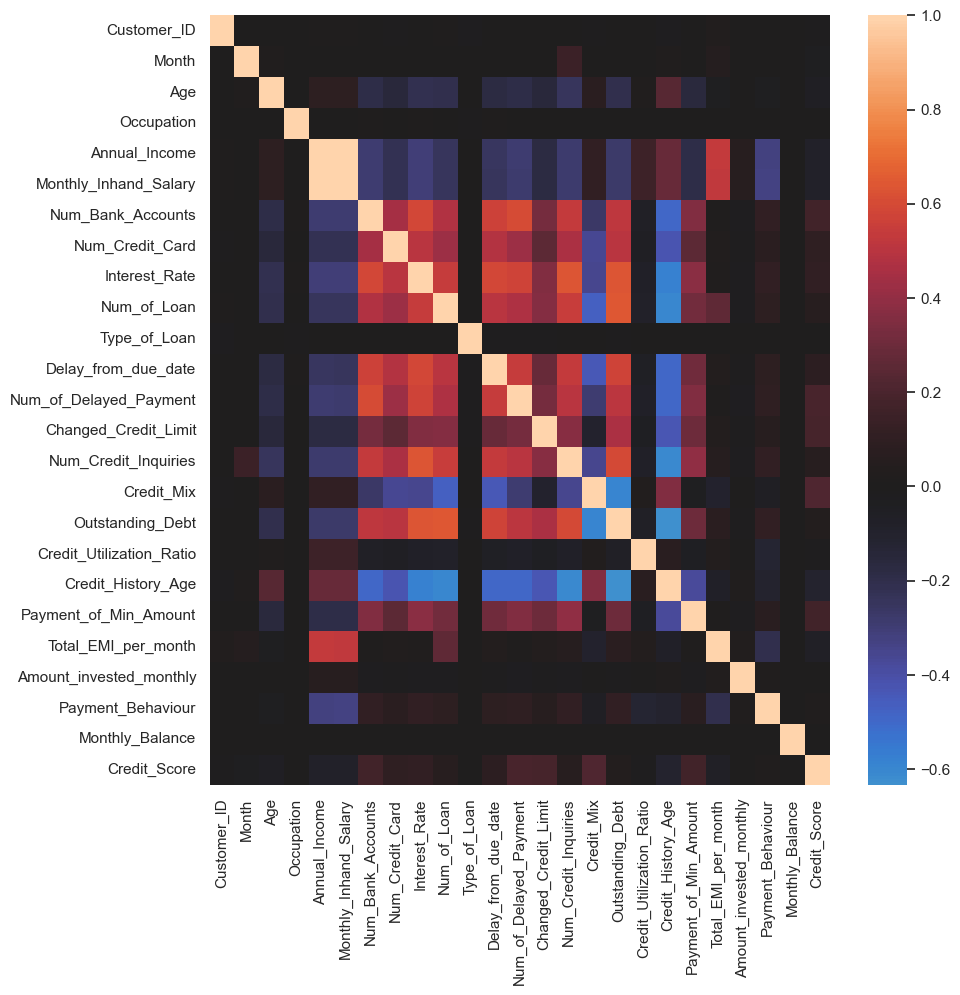

In [30]:
corr = df_copy.corr()
sns.heatmap(corr, center=0 )
# set the figure size
sns.set(rc={'figure.figsize':(12,12)})

plt.show()

In [17]:
# Before the data is used for the machine learning models it needs to be resampled and then applied to the machine learning model 

Credit Score in categorical Variable
- 1 Poor
- 0 - Good 
- 2 - Standard 

In [18]:
df_copy = df_copy.drop(df.columns[0], axis=1)


In [19]:
df_copy

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,3392,1,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,1,809.98,26.822620,265.0,1,49.574949,80.415295,2,312.494089,0
1,3392,3,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,1,809.98,28.609352,267.0,1,49.574949,81.699521,4,331.209863,0
2,3392,4,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,1,809.98,31.377862,268.0,1,49.574949,199.458074,5,223.451310,0
3,3392,5,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,1,809.98,24.797347,269.0,1,49.574949,41.420153,1,341.489231,0
4,3392,6,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,1,809.98,27.262259,270.0,1,49.574949,62.430172,1,340.479212,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79614,37932,4,25.0,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,...,1,502.38,34.663572,378.0,1,35.104023,60.971333,0,479.866228,1
79615,37932,5,25.0,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,...,1,502.38,40.565631,379.0,1,35.104023,54.185950,1,496.651610,1
79616,37932,6,25.0,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,...,1,502.38,41.255522,380.0,1,35.104023,24.028477,0,516.809083,1
79617,37932,7,25.0,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,...,1,502.38,33.638208,381.0,1,35.104023,251.672582,3,319.164979,2


In [ ]:
df_copy.drop('Monthly_Inhand_Salary', axis = 1, inplace =True)

In [35]:
df_copy.drop('Customer_ID', axis = 1, inplace =True)

In [39]:
df_copy.to_csv("../cleaned_data/final_df.csv")

Here we have two columns which are highly correlated with each other . So the thing is to which column to remove. it may be more appropriate to keep Annual_Income as it's a more stable and long-term indicator of a person's financial situation. On the other hand, if the goal is to predict short-term spending behavior, it may be more appropriate to keep Monthly_Inhand_Salary.